# Weekend Movie Trip

Dalton Hahn (2762306)

## MovieLens Datasets

MovieLens Latest-Small Dataset
http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Read in the Processed Data

In [2]:
df = pd.read_csv("../data/processed/movies_processed.csv")
df.head()

,Unnamed: 0,movieId,title,Year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genres,GenreCodes,AvRate
0,0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,"['Adventure', 'Animation', 'Children', 'Comedy...","[2, 3, 4, 5, 9]",3.920930
1,1,2,Jumanji (1995),1995.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,"['Adventure', 'Children', 'Fantasy']","[2, 4, 9]",3.431818
2,2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,"['Comedy', 'Romance']","[5, 14]",3.259615
3,3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,"['Comedy', 'Drama', 'Romance']","[5, 8, 14]",2.357143
4,4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,['Comedy'],[5],3.071429


### Need to clean up years column some, seem to be getting some errros

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,movieId,title,Year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genres,GenreCodes,AvRate
0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,"['Adventure', 'Animation', 'Children', 'Comedy...","[2, 3, 4, 5, 9]",3.920930
1,2,Jumanji (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,"['Adventure', 'Children', 'Fantasy']","[2, 4, 9]",3.431818
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,"['Comedy', 'Romance']","[5, 14]",3.259615
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,"['Comedy', 'Drama', 'Romance']","[5, 8, 14]",2.357143
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,['Comedy'],[5],3.071429


In [4]:
unique_years = df.Year.unique()
print(unique_years)
for index, row in df.iterrows():
    if row['Year'] < 1800:
        df.drop(index, inplace=True)


[1995. 1994. 1996. 1976. 1992. 1967. 1993. 1964. 1977. 1965. 1982. 1990.
 1991. 1989. 1937. 1940. 1969. 1981. 1973. 1970. 1955. 1959. 1968. 1988.
 1997. 1972.    6. 1943. 1952. 1951. 1957. 1961. 1958. 1954. 1934. 1944.
 1960. 1963. 1942. 1941. 1953. 1939. 1950. 1946. 1945. 1938. 1947. 1935.
 1936. 1956. 1949. 1932. 1975. 1974. 1971. 1979. 1987. 1986. 1980. 1978.
 1985. 1966. 1962. 1983. 1984. 1948. 1933. 1931. 1922. 1998. 1929. 1930.
 1927. 1928. 1999. 2000. 1926. 1919. 1921. 1925. 1923. 2001. 2002. 2003.
 1920. 1915. 1924. 2004. 1916. 1917. 2005. 2006. 1902.   nan 1903. 2007.
 2008. 2009.  500. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.
 1908.]


## Encountered an error with the way I was previously extracting years from the title row, have fixed in processing notebook

In [5]:
# Dropping NaNs from Years
df = df.dropna()

### Struggling to apply k-means with genres in current form, will one-hot encode them

In [6]:
#one_hot = df.GenreCodes.str.get_dummies()
#df = df.join(one_hot)
#df.head()

# INSTEAD OF DOING ONE-HOT HERE, WENT BACK AND ADDED IT TO PROCESSING NOTEBOOK

## Applying K-Means

In [7]:
# Using https://medium.com/hanman/data-clustering-what-type-of-movies-are-in-the-imdb-top-250-7ef59372a93b 
#for inspiration

kmeans_model = KMeans(20)

# Need to drop all non-numeric data to perform fitting
kmeans_model.fit(df.drop(['movieId', 'title', 'Genres', 'GenreCodes'], axis=1))
clust_labels = kmeans_model.predict(df.drop(['movieId', 'title', 'Genres', 'GenreCodes'], axis=1))


cent = kmeans_model.cluster_centers_

In [8]:
kmeans = pd.DataFrame(clust_labels)

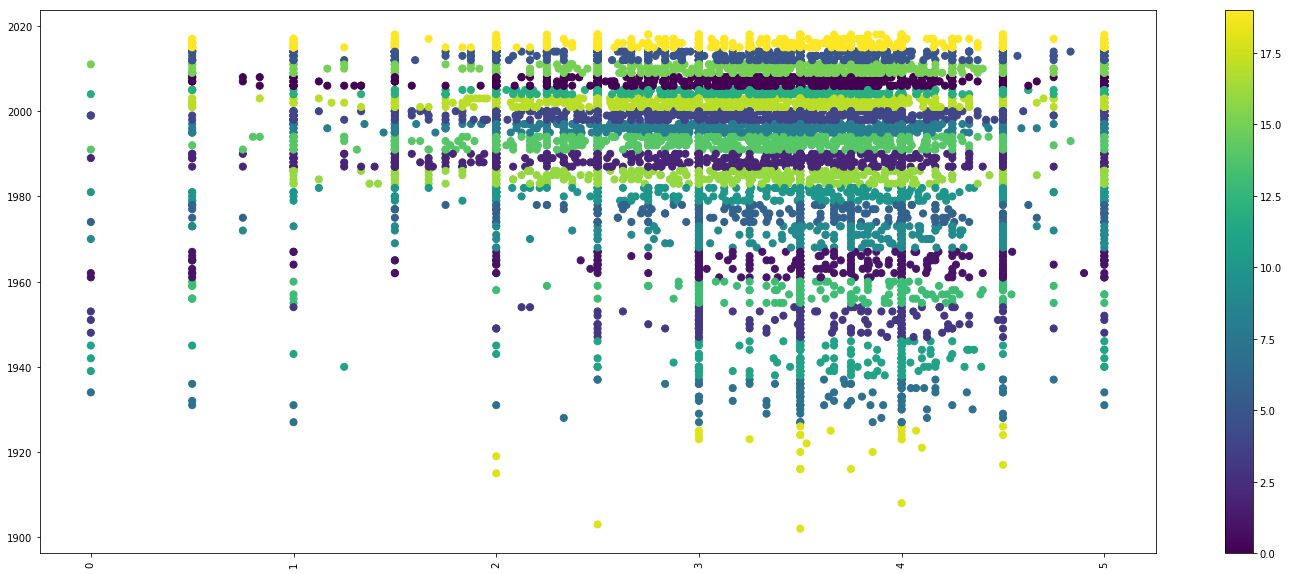

In [9]:
fig = plt.figure(figsize=[25,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(df['AvRate'],df['Year'], c=kmeans[0], s=50)
plt.xticks(rotation='vertical')

plt.colorbar(scatter)

## CONCLUSIONS
There appears to be a fairly even distribution of rating scores across movies released over many years.  While there are certainly fewer movies in this dataset from the earlier years, it doesn't seem that there is any significance over whether users felt that a given movie was deserving of a high score or not.  Using this clustering methodology, we can recommend to users that liked a certain movie other movies near that same rating.  However, we can also extend this methodology to inclusion of genre data as well.  Say a user rated a Romantic-Comedy movie very highly, we could recommend a similarly rated Romantic-Comedy to that user in the hopes that it would be enjoyable for them as well.